## Реализация сверточной нейронной сети для классификации цифр.
Исходные данные - база MNIST (http://yann.lecun.com/exdb/mnist/). Обучающая выборка - 70%, тестовая - 30%.


In [1]:
# Импортируем нужные модули
import sys
import os
sys.path.append(os.path.abspath('C:/Users/klimm/Desktop/lab2'))

import numpy as np
import matplotlib.pyplot as plt

from utils.load_mnist import load_mnist_data
from utils.split_train_validation import split_train_validation, train_test_split
from utils.one_hot_encode import one_hot_encode
from core.metrics import confusion_matrix, compute_roc_auc, precision_recall_f1
from src.models.my_cnn import MyCNN
from sklearn.manifold import TSNE
import seaborn as sns


In [2]:

# Загружаем MNIST данные
X_train, Y_train, X_test, Y_test = load_mnist_data()

# Проверяем размерности исходных данных
print(f"Исходные данные:\nX_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")

# Разделяем обучающую выборку на 70% для обучения и 30% для валидации
X_train, X_test, Y_train, Y_test = split_train_validation(X_train, Y_train)

# Проверяем размеры новых выборок
print(f"X_train.shape: {X_train.shape}, Y_train.shape: {Y_train.shape}")
print(f"X_test.shape: {X_test.shape}, Y_test.shape: {Y_test.shape}")


Read magic number: 2051
Images: num_images=60000, rows=28, cols=28
Loaded 47040000 image pixels.
Read magic number: 2049
Read magic number: 2051
Images: num_images=10000, rows=28, cols=28
Loaded 7840000 image pixels.
Read magic number: 2049
Исходные данные:
X_train: (60000, 28, 28), Y_train: (60000,)
X_test: (10000, 28, 28), Y_test: (10000,)
X_train.shape: (42000, 28, 28), Y_train.shape: (42000,)
X_test.shape: (18000, 28, 28), Y_test.shape: (18000,)


In [3]:
# Добавляем ось каналов
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Нормализуем данные об изображениях в диапазон [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Кодируем метки
Y_train = one_hot_encode(Y_train)
Y_test = one_hot_encode(Y_test)

### Подобие LeNet-5

In [10]:
from src.models.le_net_5 import LeNet5

In [11]:
# Инициализация модели
lenet5 = LeNet5()

# Обучение модели
epochs = 10
learning_rate = 0.001
batch_size = 64
lenet5.train(X_train, Y_train, epochs, learning_rate, batch_size, X_test, Y_test)


Epoch 1/10
Training - Loss: 1.6225, Accuracy: 49.03%, F1: 0.4844
Validation - Loss: 0.8453, Accuracy: 74.22%, F1: 0.7364

Epoch 2/10
Training - Loss: 0.7045, Accuracy: 79.65%, F1: 0.7924
Validation - Loss: 0.6441, Accuracy: 81.17%, F1: 0.8088

Epoch 3/10
Training - Loss: 0.5933, Accuracy: 83.62%, F1: 0.8333
Validation - Loss: 0.5839, Accuracy: 83.64%, F1: 0.8343

Epoch 4/10
Training - Loss: 0.5451, Accuracy: 85.30%, F1: 0.8505
Validation - Loss: 0.5454, Accuracy: 85.08%, F1: 0.8489

Epoch 5/10
Training - Loss: 0.5146, Accuracy: 86.40%, F1: 0.8618
Validation - Loss: 0.5227, Accuracy: 85.88%, F1: 0.8570

Epoch 6/10
Training - Loss: 0.4929, Accuracy: 87.08%, F1: 0.8687
Validation - Loss: 0.5078, Accuracy: 86.54%, F1: 0.8638

Epoch 7/10
Training - Loss: 0.4760, Accuracy: 87.56%, F1: 0.8737
Validation - Loss: 0.4936, Accuracy: 87.07%, F1: 0.8691

Epoch 8/10
Training - Loss: 0.4621, Accuracy: 87.99%, F1: 0.8781
Validation - Loss: 0.4827, Accuracy: 87.30%, F1: 0.8715

Epoch 9/10
Training - L

Выполняем t-SNE...


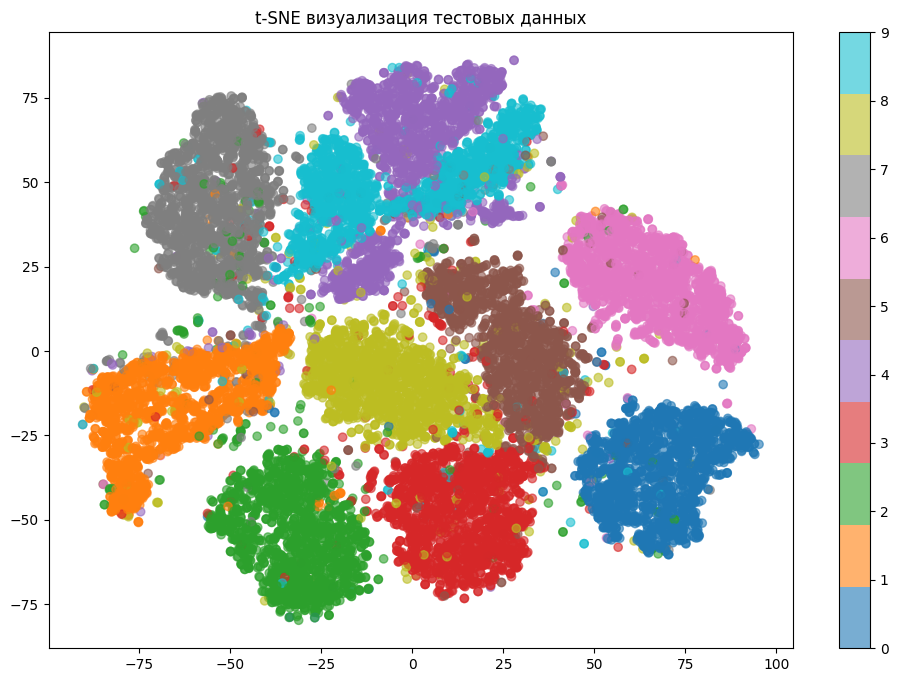

In [12]:
batch_size = 100
y_pred = []
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i + batch_size]
    y_pred_batch = lenet5.forward(batch)
    y_pred.append(y_pred_batch)
y_pred = np.vstack(y_pred)


# t-SNE визуализация
print("Выполняем t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
# Получаем признаки из предпоследнего слоя (до softmax)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
features_2d = tsne.fit_transform(X_test_flat)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1],
                    c=np.argmax(Y_test, axis=1),
                    cmap='tab10',
                    alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE визуализация тестовых данных')
plt.show()


Вычисляем метрики...


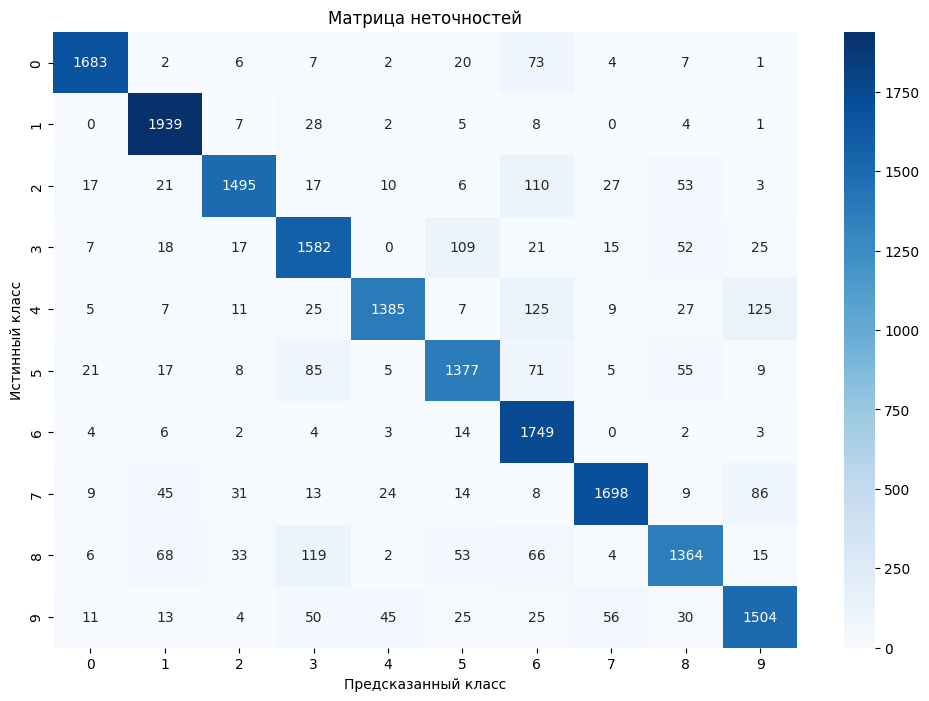


Строим ROC-кривые...


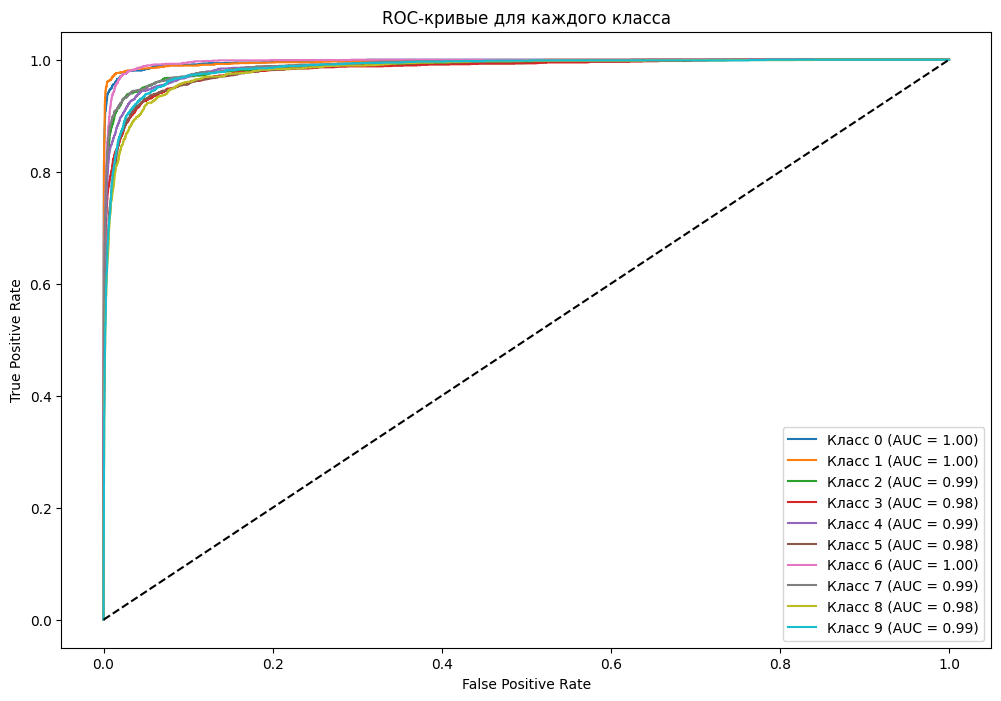


Анализ ошибок классификации:
Всего ошибок: 2224 из 18000 (12.36%)

Класс 0:
Precision: 0.9546
Recall: 0.9324
F1-score: 0.9434
AUC: 0.9968

Класс 1:
Precision: 0.9078
Recall: 0.9724
F1-score: 0.9390
AUC: 0.9965

Класс 2:
Precision: 0.9263
Recall: 0.8499
F1-score: 0.8865
AUC: 0.9875

Класс 3:
Precision: 0.8197
Recall: 0.8570
F1-score: 0.8379
AUC: 0.9830

Класс 4:
Precision: 0.9371
Recall: 0.8024
F1-score: 0.8645
AUC: 0.9886

Класс 5:
Precision: 0.8448
Recall: 0.8330
F1-score: 0.8389
AUC: 0.9842

Класс 6:
Precision: 0.7753
Recall: 0.9787
F1-score: 0.8652
AUC: 0.9966

Класс 7:
Precision: 0.9340
Recall: 0.8766
F1-score: 0.9044
AUC: 0.9899

Класс 8:
Precision: 0.8509
Recall: 0.7884
F1-score: 0.8185
AUC: 0.9823

Класс 9:
Precision: 0.8488
Recall: 0.8531
F1-score: 0.8509
AUC: 0.9857

Macro average metrics:
Precision: 0.8799
Recall: 0.8744
F1-score: 0.8749
AUC: 0.9891

Weighted average metrics:
Precision: 0.8807
Recall: 0.8764
F1-score: 0.8763


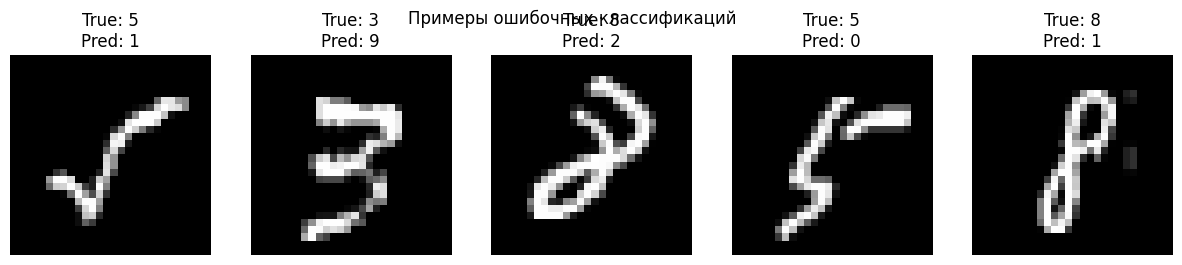


Наиболее частые ошибки:
Класс 8 принят за класс 3: 119 раз
Класс 4 принят за класс 6: 125 раз
Класс 4 принят за класс 9: 125 раз


In [13]:
# Матрица неточностей и метрики
print("\nВычисляем метрики...")
conf_matrix = confusion_matrix(Y_test, y_pred)

# Визуализация матрицы неточностей
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица неточностей')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Вычисление метрик
precision, recall, f1_scores = precision_recall_f1(conf_matrix)

# ROC-кривые и AUC
print("\nСтроим ROC-кривые...")
fpr, tpr, roc_auc = compute_roc_auc(Y_test, y_pred)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Класс {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для каждого класса')
plt.legend()
plt.show()

# Анализ ошибок
print("\nАнализ ошибок классификации:")
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)
errors = np.where(y_pred_classes != y_true_classes)[0]

print(f"Всего ошибок: {len(errors)} из {len(y_true_classes)} ({len(errors)/len(y_true_classes)*100:.2f}%)")

# Создаем словарь для хранения метрик по классам
class_metrics = {}

# Вычисляем метрики для каждого класса
for i in range(10):
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    class_metrics[i] = {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': roc_auc[i]
    }

# Выводим метрики по классам
for digit, metrics in class_metrics.items():
    print(f"\nКласс {digit}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")

# Macro average (простое среднее по классам)
macro_precision = np.mean([metrics['precision'] for metrics in class_metrics.values()])
macro_recall = np.mean([metrics['recall'] for metrics in class_metrics.values()])
macro_f1 = np.mean([metrics['f1'] for metrics in class_metrics.values()])
macro_auc = np.mean([metrics['auc'] for metrics in class_metrics.values()])

# Weighted average (взвешенное по количеству примеров каждого класса)
weights = np.sum(conf_matrix, axis=1) / np.sum(conf_matrix)
weighted_precision = np.sum([metrics['precision'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_recall = np.sum([metrics['recall'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_f1 = np.sum([metrics['f1'] * w for metrics, w in zip(class_metrics.values(), weights)])

print("\nMacro average metrics:")
print(f"Precision: {macro_precision:.4f}")
print(f"Recall: {macro_recall:.4f}")
print(f"F1-score: {macro_f1:.4f}")
print(f"AUC: {macro_auc:.4f}")

print("\nWeighted average metrics:")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-score: {weighted_f1:.4f}")
# Визуализация примеров ошибок
if len(errors) > 0:
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(errors[:5]):  # Показываем первые 5 ошибок
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}')
        plt.axis('off')
    plt.suptitle('Примеры ошибочных классификаций')
    plt.show()

# Анализ наиболее проблемных классов
error_matrix = conf_matrix - np.diag(np.diag(conf_matrix))
most_confused = np.unravel_index(np.argsort(error_matrix.ravel())[-3:], error_matrix.shape)
print("\nНаиболее частые ошибки:")
for i, j in zip(most_confused[0], most_confused[1]):
    print(f"Класс {i} принят за класс {j}: {error_matrix[i,j]} раз")

### Первая модель, добавил адам и батчнорм.

In [6]:
# Инициализация модели
mycnn = MyCNN()

# Обучение модели
epochs = 10
learning_rate = 0.001
batch_size = 64
mycnn.train(X_train, Y_train, epochs, learning_rate, batch_size, X_test, Y_test)


Epoch 1/10
Training - Loss: 0.6032, Accuracy: 87.48%, F1: 0.8735
Validation - Loss: 0.3469, Accuracy: 93.49%, F1: 0.9341

Epoch 2/10
Training - Loss: 0.3490, Accuracy: 92.41%, F1: 0.9234
Validation - Loss: 0.2721, Accuracy: 94.13%, F1: 0.9406

Epoch 3/10
Training - Loss: 0.2998, Accuracy: 93.04%, F1: 0.9298
Validation - Loss: 0.2635, Accuracy: 93.68%, F1: 0.9361

Epoch 4/10
Training - Loss: 0.2870, Accuracy: 93.05%, F1: 0.9297
Validation - Loss: 0.2537, Accuracy: 93.80%, F1: 0.9372

Epoch 5/10
Training - Loss: 0.2716, Accuracy: 93.37%, F1: 0.9330
Validation - Loss: 0.2481, Accuracy: 93.74%, F1: 0.9367

Epoch 6/10
Training - Loss: 0.2580, Accuracy: 93.74%, F1: 0.9368
Validation - Loss: 0.2377, Accuracy: 94.22%, F1: 0.9416

Epoch 7/10
Training - Loss: 0.2499, Accuracy: 93.95%, F1: 0.9389
Validation - Loss: 0.2423, Accuracy: 94.14%, F1: 0.9407

Epoch 8/10
Training - Loss: 0.2466, Accuracy: 94.11%, F1: 0.9405
Validation - Loss: 0.2452, Accuracy: 94.02%, F1: 0.9397

Epoch 9/10
Training - L

Выполняем t-SNE...


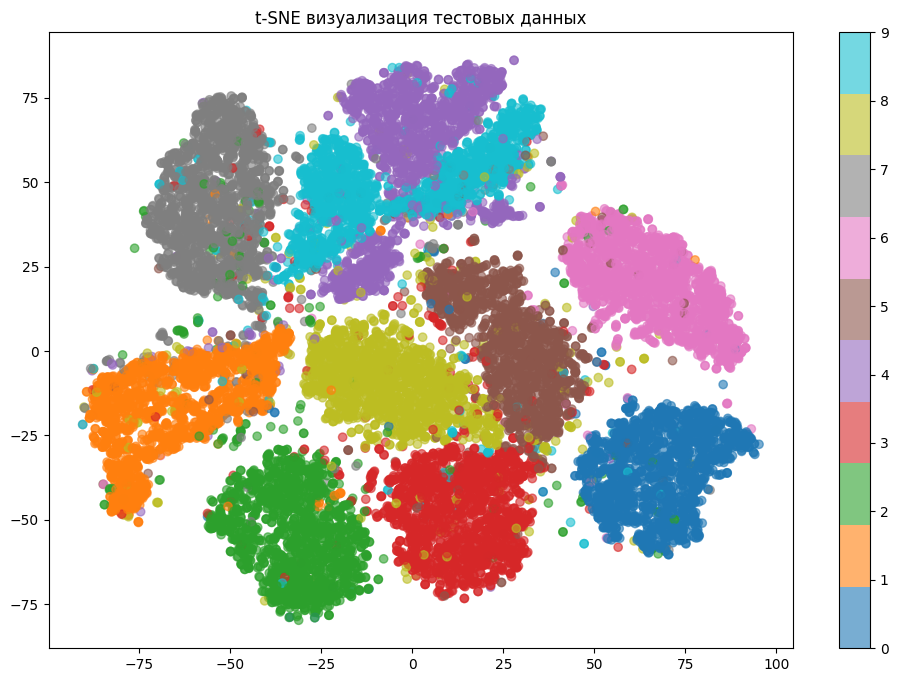

In [7]:
batch_size = 100
y_pred = []
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i + batch_size]
    y_pred_batch = mycnn.forward(batch)
    y_pred.append(y_pred_batch)
y_pred = np.vstack(y_pred)


# t-SNE визуализация
print("Выполняем t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
# Получаем признаки из предпоследнего слоя (до softmax)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
features_2d = tsne.fit_transform(X_test_flat)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1],
                    c=np.argmax(Y_test, axis=1),
                    cmap='tab10',
                    alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE визуализация тестовых данных')
plt.show()


Вычисляем метрики...


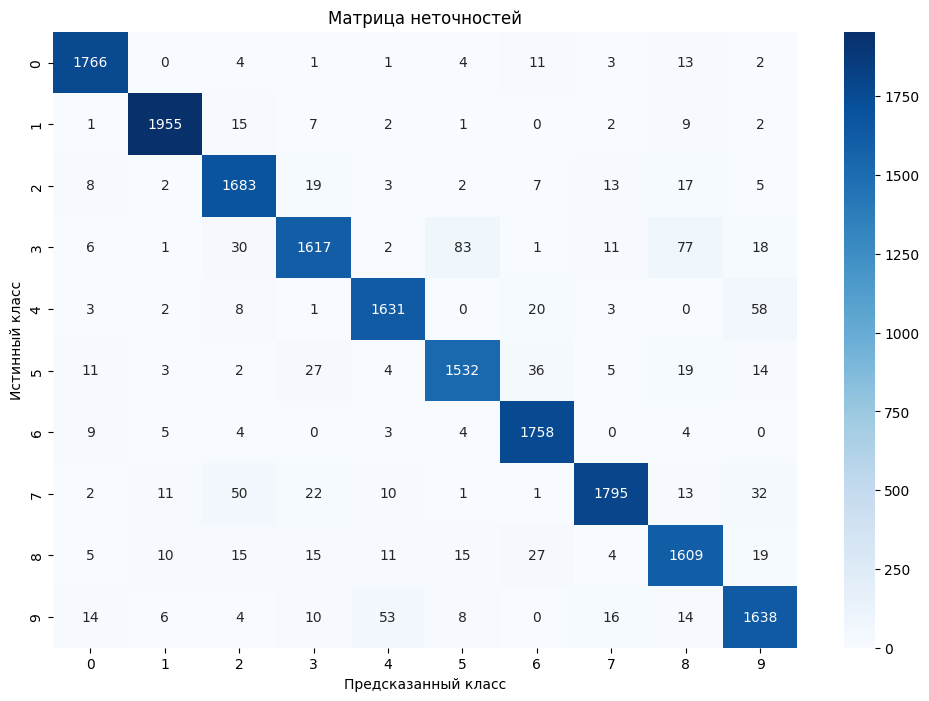


Строим ROC-кривые...


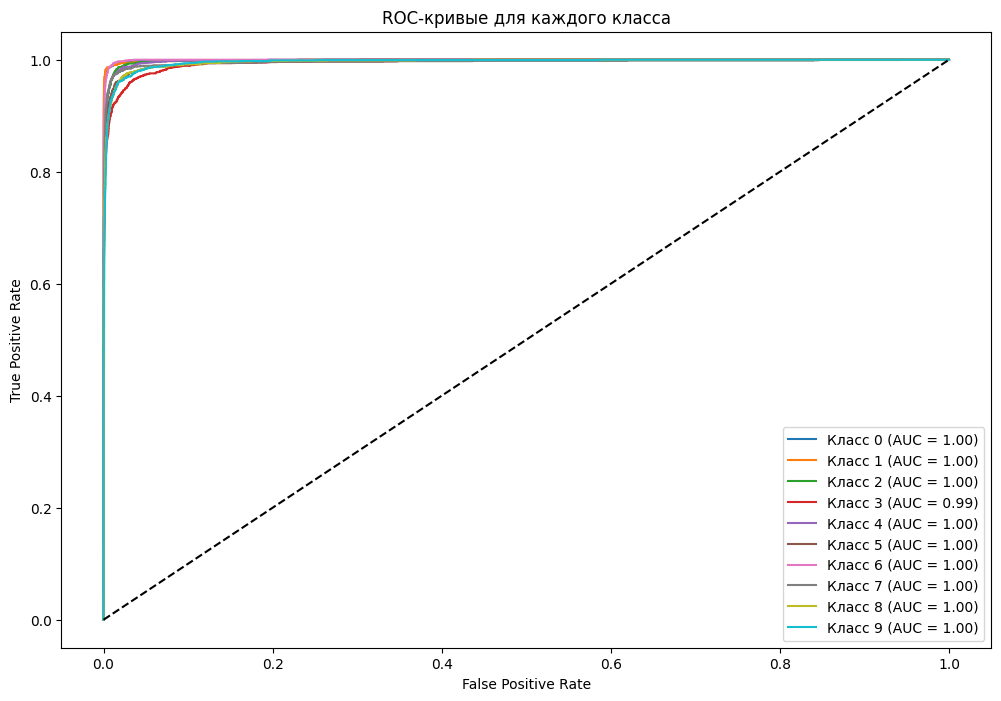


Анализ ошибок классификации:
Всего ошибок: 1016 из 18000 (5.64%)

Класс 0:
Precision: 0.9677
Recall: 0.9784
F1-score: 0.9730
AUC: 0.9993

Класс 1:
Precision: 0.9799
Recall: 0.9804
F1-score: 0.9802
AUC: 0.9993

Класс 2:
Precision: 0.9273
Recall: 0.9568
F1-score: 0.9418
AUC: 0.9981

Класс 3:
Precision: 0.9407
Recall: 0.8759
F1-score: 0.9072
AUC: 0.9943

Класс 4:
Precision: 0.9483
Recall: 0.9450
F1-score: 0.9466
AUC: 0.9983

Класс 5:
Precision: 0.9285
Recall: 0.9268
F1-score: 0.9276
AUC: 0.9963

Класс 6:
Precision: 0.9447
Recall: 0.9838
F1-score: 0.9638
AUC: 0.9995

Класс 7:
Precision: 0.9692
Recall: 0.9267
F1-score: 0.9475
AUC: 0.9958

Класс 8:
Precision: 0.9065
Recall: 0.9301
F1-score: 0.9181
AUC: 0.9961

Класс 9:
Precision: 0.9161
Recall: 0.9291
F1-score: 0.9226
AUC: 0.9960

Macro average metrics:
Precision: 0.9429
Recall: 0.9433
F1-score: 0.9428
AUC: 0.9973

Weighted average metrics:
Precision: 0.9438
Recall: 0.9436
F1-score: 0.9434


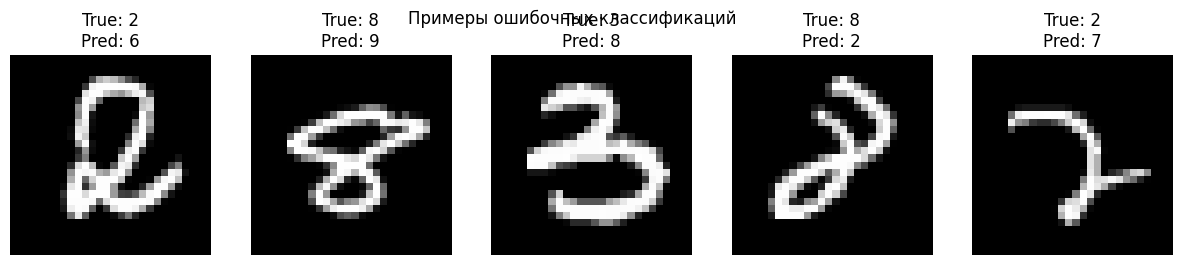


Наиболее частые ошибки:
Класс 4 принят за класс 9: 58 раз
Класс 3 принят за класс 8: 77 раз
Класс 3 принят за класс 5: 83 раз


In [8]:
# Матрица неточностей и метрики
print("\nВычисляем метрики...")
conf_matrix = confusion_matrix(Y_test, y_pred)

# Визуализация матрицы неточностей
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица неточностей')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Вычисление метрик
precision, recall, f1_scores = precision_recall_f1(conf_matrix)

# ROC-кривые и AUC
print("\nСтроим ROC-кривые...")
fpr, tpr, roc_auc = compute_roc_auc(Y_test, y_pred)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Класс {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для каждого класса')
plt.legend()
plt.show()

# Анализ ошибок
print("\nАнализ ошибок классификации:")
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)
errors = np.where(y_pred_classes != y_true_classes)[0]

print(f"Всего ошибок: {len(errors)} из {len(y_true_classes)} ({len(errors)/len(y_true_classes)*100:.2f}%)")

# Создаем словарь для хранения метрик по классам
class_metrics = {}

# Вычисляем метрики для каждого класса
for i in range(10):
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    class_metrics[i] = {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': roc_auc[i]
    }

# Выводим метрики по классам
for digit, metrics in class_metrics.items():
    print(f"\nКласс {digit}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")

# Macro average (простое среднее по классам)
macro_precision = np.mean([metrics['precision'] for metrics in class_metrics.values()])
macro_recall = np.mean([metrics['recall'] for metrics in class_metrics.values()])
macro_f1 = np.mean([metrics['f1'] for metrics in class_metrics.values()])
macro_auc = np.mean([metrics['auc'] for metrics in class_metrics.values()])

# Weighted average (взвешенное по количеству примеров каждого класса)
weights = np.sum(conf_matrix, axis=1) / np.sum(conf_matrix)
weighted_precision = np.sum([metrics['precision'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_recall = np.sum([metrics['recall'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_f1 = np.sum([metrics['f1'] * w for metrics, w in zip(class_metrics.values(), weights)])

print("\nMacro average metrics:")
print(f"Precision: {macro_precision:.4f}")
print(f"Recall: {macro_recall:.4f}")
print(f"F1-score: {macro_f1:.4f}")
print(f"AUC: {macro_auc:.4f}")

print("\nWeighted average metrics:")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-score: {weighted_f1:.4f}")
# Визуализация примеров ошибок
if len(errors) > 0:
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(errors[:5]):  # Показываем первые 5 ошибок
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}')
        plt.axis('off')
    plt.suptitle('Примеры ошибочных классификаций')
    plt.show()

# Анализ наиболее проблемных классов
error_matrix = conf_matrix - np.diag(np.diag(conf_matrix))
most_confused = np.unravel_index(np.argsort(error_matrix.ravel())[-3:], error_matrix.shape)
print("\nНаиболее частые ошибки:")
for i, j in zip(most_confused[0], most_confused[1]):
    print(f"Класс {i} принят за класс {j}: {error_matrix[i,j]} раз")

In [9]:

import os

# Проверяем текущую рабочую директорию
current_dir = os.getcwd()
print(f"Текущая директория: {current_dir}")

# Сохраняем веса
weights_path = 'model1_weights.npy'
mycnn.save_weights(weights_path)

# Проверяем, что файл создался
if os.path.exists(weights_path):
    print(f"Файл создан: {os.path.abspath(weights_path)}")
    print(f"Размер файла: {os.path.getsize(weights_path) / 1024 / 1024:.2f} MB")

Текущая директория: c:\Users\klimm\Desktop\lab2\notebooks\experiments
Веса сохранены в model1_weights.npy
Файл создан: c:\Users\klimm\Desktop\lab2\notebooks\experiments\model1_weights.npy
Размер файла: 0.34 MB


# Вторая модель

Добавлен Adam оптимизатор и батчнормализация после последнего полносвязного слоя.


In [1]:
from src.models.my_cnn_2 import MyCNN2


In [7]:
mycnn2 = MyCNN2()
# Обучение модели
epochs = 10
learning_rate = 0.001
batch_size = 32
mycnn2.train(X_train, Y_train, epochs, learning_rate, batch_size, X_test, Y_test)


Epoch 1/10
Training - Loss: 0.7011, Accuracy: 83.81%, F1: 0.8358
Validation - Loss: 0.3531, Accuracy: 93.94%, F1: 0.9385

Epoch 2/10
Training - Loss: 0.5499, Accuracy: 88.11%, F1: 0.8799
Validation - Loss: 0.3526, Accuracy: 95.40%, F1: 0.9536

Epoch 3/10
Training - Loss: 0.6251, Accuracy: 87.56%, F1: 0.8745
Validation - Loss: 0.4501, Accuracy: 94.69%, F1: 0.9464

Epoch 4/10
Training - Loss: 0.7111, Accuracy: 87.86%, F1: 0.8775
Validation - Loss: 0.5221, Accuracy: 95.45%, F1: 0.9542

Epoch 5/10
Training - Loss: 0.6930, Accuracy: 91.44%, F1: 0.9136
Validation - Loss: 0.5786, Accuracy: 95.91%, F1: 0.9586

Epoch 6/10
Training - Loss: 0.8173, Accuracy: 89.23%, F1: 0.8912
Validation - Loss: 0.6933, Accuracy: 95.31%, F1: 0.9526

Epoch 7/10
Training - Loss: 1.1397, Accuracy: 83.69%, F1: 0.8345
Validation - Loss: 0.9595, Accuracy: 91.72%, F1: 0.9158

Epoch 8/10
Training - Loss: 1.1534, Accuracy: 88.02%, F1: 0.8785
Validation - Loss: 1.0301, Accuracy: 93.38%, F1: 0.9329

Epoch 9/10
Training - L

Выполняем t-SNE...


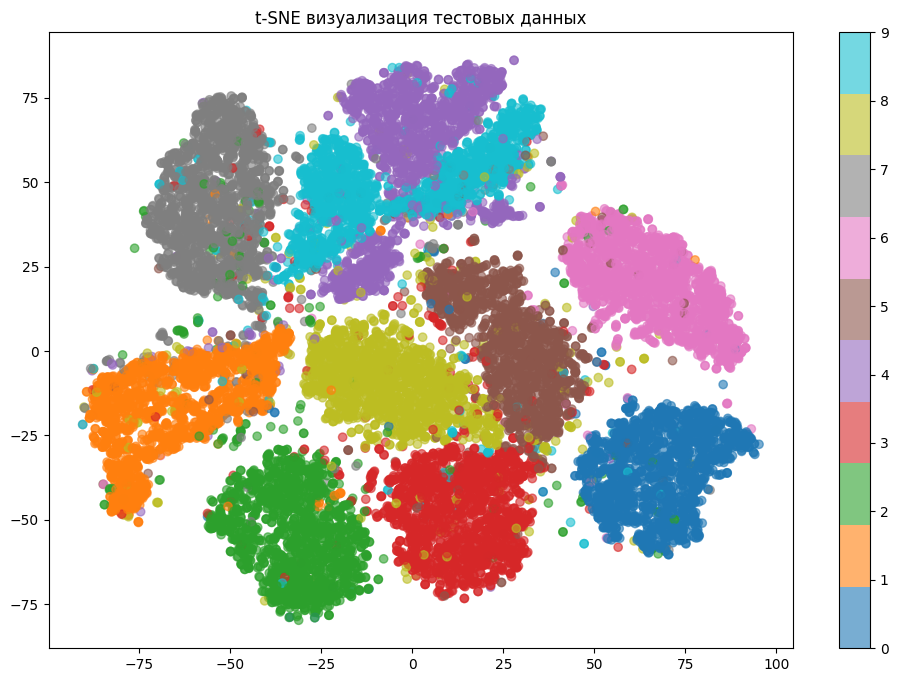

In [9]:
batch_size = 100
y_pred = []
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i + batch_size]
    y_pred_batch = mycnn2.forward(batch)
    y_pred.append(y_pred_batch)
y_pred = np.vstack(y_pred)


# t-SNE визуализация
print("Выполняем t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
# Получаем признаки из предпоследнего слоя (до softmax)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
features_2d = tsne.fit_transform(X_test_flat)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1],
                    c=np.argmax(Y_test, axis=1),
                    cmap='tab10',
                    alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE визуализация тестовых данных')
plt.show()


Вычисляем метрики...


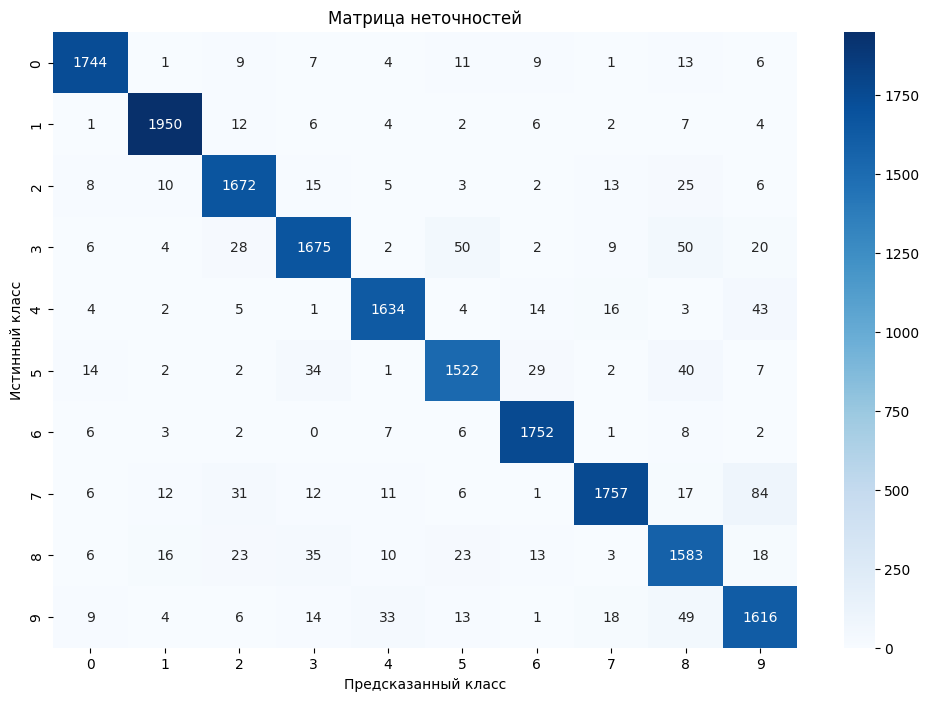


Строим ROC-кривые...


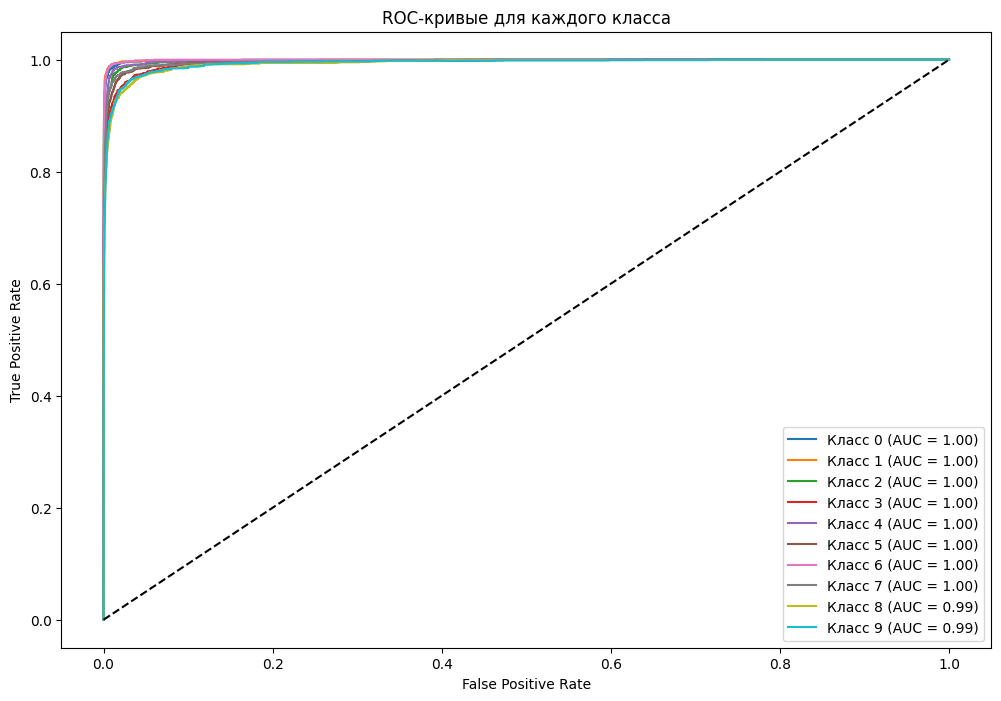


Анализ ошибок классификации:
Всего ошибок: 1095 из 18000 (6.08%)

Класс 0:
Precision: 0.9667
Recall: 0.9662
F1-score: 0.9665
AUC: 0.9992

Класс 1:
Precision: 0.9731
Recall: 0.9779
F1-score: 0.9755
AUC: 0.9994

Класс 2:
Precision: 0.9341
Recall: 0.9505
F1-score: 0.9422
AUC: 0.9973

Класс 3:
Precision: 0.9311
Recall: 0.9074
F1-score: 0.9191
AUC: 0.9954

Класс 4:
Precision: 0.9550
Recall: 0.9467
F1-score: 0.9508
AUC: 0.9983

Класс 5:
Precision: 0.9280
Recall: 0.9208
F1-score: 0.9244
AUC: 0.9965

Класс 6:
Precision: 0.9579
Recall: 0.9804
F1-score: 0.9690
AUC: 0.9995

Класс 7:
Precision: 0.9643
Recall: 0.9071
F1-score: 0.9348
AUC: 0.9964

Класс 8:
Precision: 0.8819
Recall: 0.9150
F1-score: 0.8982
AUC: 0.9934

Класс 9:
Precision: 0.8948
Recall: 0.9166
F1-score: 0.9056
AUC: 0.9938

Macro average metrics:
Precision: 0.9387
Recall: 0.9389
F1-score: 0.9386
AUC: 0.9969

Weighted average metrics:
Precision: 0.9396
Recall: 0.9392
F1-score: 0.9392


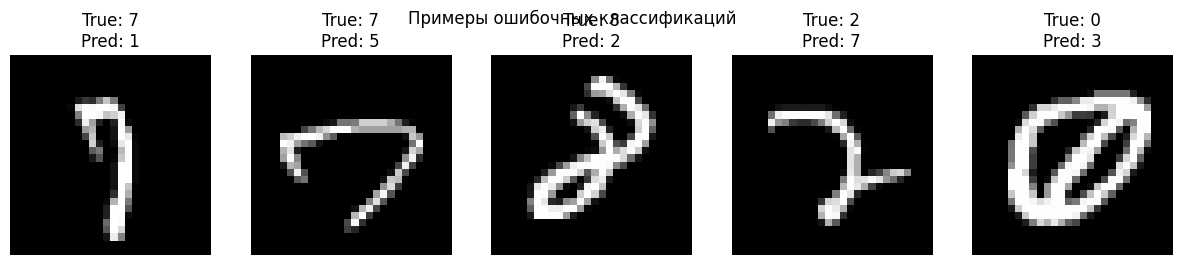


Наиболее частые ошибки:
Класс 3 принят за класс 8: 50 раз
Класс 3 принят за класс 5: 50 раз
Класс 7 принят за класс 9: 84 раз


In [10]:
# Матрица неточностей и метрики
print("\nВычисляем метрики...")
conf_matrix = confusion_matrix(Y_test, y_pred)

# Визуализация матрицы неточностей
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица неточностей')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Вычисление метрик
precision, recall, f1_scores = precision_recall_f1(conf_matrix)

# ROC-кривые и AUC
print("\nСтроим ROC-кривые...")
fpr, tpr, roc_auc = compute_roc_auc(Y_test, y_pred)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Класс {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для каждого класса')
plt.legend()
plt.show()

# Анализ ошибок
print("\nАнализ ошибок классификации:")
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)
errors = np.where(y_pred_classes != y_true_classes)[0]

print(f"Всего ошибок: {len(errors)} из {len(y_true_classes)} ({len(errors)/len(y_true_classes)*100:.2f}%)")

# Создаем словарь для хранения метрик по классам
class_metrics = {}

# Вычисляем метрики для каждого класса
for i in range(10):
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    class_metrics[i] = {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': roc_auc[i]
    }

# Выводим метрики по классам
for digit, metrics in class_metrics.items():
    print(f"\nКласс {digit}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")

# Macro average (простое среднее по классам)
macro_precision = np.mean([metrics['precision'] for metrics in class_metrics.values()])
macro_recall = np.mean([metrics['recall'] for metrics in class_metrics.values()])
macro_f1 = np.mean([metrics['f1'] for metrics in class_metrics.values()])
macro_auc = np.mean([metrics['auc'] for metrics in class_metrics.values()])

# Weighted average (взвешенное по количеству примеров каждого класса)
weights = np.sum(conf_matrix, axis=1) / np.sum(conf_matrix)
weighted_precision = np.sum([metrics['precision'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_recall = np.sum([metrics['recall'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_f1 = np.sum([metrics['f1'] * w for metrics, w in zip(class_metrics.values(), weights)])

print("\nMacro average metrics:")
print(f"Precision: {macro_precision:.4f}")
print(f"Recall: {macro_recall:.4f}")
print(f"F1-score: {macro_f1:.4f}")
print(f"AUC: {macro_auc:.4f}")

print("\nWeighted average metrics:")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-score: {weighted_f1:.4f}")
# Визуализация примеров ошибок
if len(errors) > 0:
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(errors[:5]):  # Показываем первые 5 ошибок
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}')
        plt.axis('off')
    plt.suptitle('Примеры ошибочных классификаций')
    plt.show()

# Анализ наиболее проблемных классов
error_matrix = conf_matrix - np.diag(np.diag(conf_matrix))
most_confused = np.unravel_index(np.argsort(error_matrix.ravel())[-3:], error_matrix.shape)
print("\nНаиболее частые ошибки:")
for i, j in zip(most_confused[0], most_confused[1]):
    print(f"Класс {i} принят за класс {j}: {error_matrix[i,j]} раз")

In [12]:

import os

# Проверяем текущую рабочую директорию
current_dir = os.getcwd()
print(f"Текущая директория: {current_dir}")

# Сохраняем веса
weights_path = 'model2_weights.npy'
mycnn2.save_weights(weights_path)

# Проверяем, что файл создался
if os.path.exists(weights_path):
    print(f"Файл создан: {os.path.abspath(weights_path)}")
    print(f"Размер файла: {os.path.getsize(weights_path) / 1024 / 1024:.2f} MB")

Текущая директория: c:\Users\klimm\Desktop\lab2\notebooks\experiments
Веса сохранены в model2_weights.npy
Файл создан: c:\Users\klimm\Desktop\lab2\notebooks\experiments\model2_weights.npy
Размер файла: 3.27 MB


# Третья модель
Дропаут перенесли на полносвязные слои, паддинг на свертках убрали, добавили батчнормализацию после каждого слоя свертки.

In [4]:
# Уменьшаем размер обучающей выборки до 2/5
X_train_small, _, Y_train_small, _ = train_test_split(X_train, Y_train, test_size=0.4, stratify=Y_train, random_state=42)

# Уменьшаем размер тестовой выборки до 2/5
X_test_small, _, Y_test_small, _ = train_test_split(X_test, Y_test, test_size=0.4, stratify=Y_test, random_state=42)

# Проверяем размеры новых выборок
print(f"После уменьшения:\nX_train_small: {X_train_small.shape}, Y_train_small: {Y_train_small.shape}")
print(f"X_test_small: {X_test_small.shape}, Y_test_small: {Y_test_small.shape}")


После уменьшения:
X_train_small: (25200, 28, 28, 1), Y_train_small: (25200, 10)
X_test_small: (10800, 28, 28, 1), Y_test_small: (10800, 10)


In [5]:
from src.models.my_cnn_3 import MyCNN3

In [6]:

mycnn3 = MyCNN3()
# Обучение модели
epochs = 10
learning_rate = 0.001
batch_size = 64
mycnn3.train(X_train_small, Y_train_small, epochs, learning_rate, batch_size, X_test_small, Y_test_small)



Epoch 1/10
Training - Loss: 1.0114, Accuracy: 78.69%, F1: 0.7850
Validation - Loss: 0.3721, Accuracy: 95.82%, F1: 0.9579

Epoch 2/10
Training - Loss: 0.6002, Accuracy: 89.41%, F1: 0.8935
Validation - Loss: 0.3148, Accuracy: 95.29%, F1: 0.9526

Epoch 3/10
Training - Loss: 0.4846, Accuracy: 91.33%, F1: 0.9128
Validation - Loss: 0.2706, Accuracy: 95.96%, F1: 0.9593

Epoch 4/10
Training - Loss: 0.4325, Accuracy: 92.03%, F1: 0.9197
Validation - Loss: 0.2464, Accuracy: 96.19%, F1: 0.9618

Epoch 5/10
Training - Loss: 0.4042, Accuracy: 92.65%, F1: 0.9261
Validation - Loss: 0.2306, Accuracy: 96.53%, F1: 0.9650

Epoch 6/10
Training - Loss: 0.3879, Accuracy: 92.75%, F1: 0.9270
Validation - Loss: 0.2265, Accuracy: 96.62%, F1: 0.9660

Epoch 7/10
Training - Loss: 0.3565, Accuracy: 93.57%, F1: 0.9355
Validation - Loss: 0.2146, Accuracy: 96.64%, F1: 0.9662

Epoch 8/10
Training - Loss: 0.3336, Accuracy: 94.04%, F1: 0.9400
Validation - Loss: 0.2102, Accuracy: 96.91%, F1: 0.9688

Epoch 9/10
Training - L

Выполняем t-SNE...


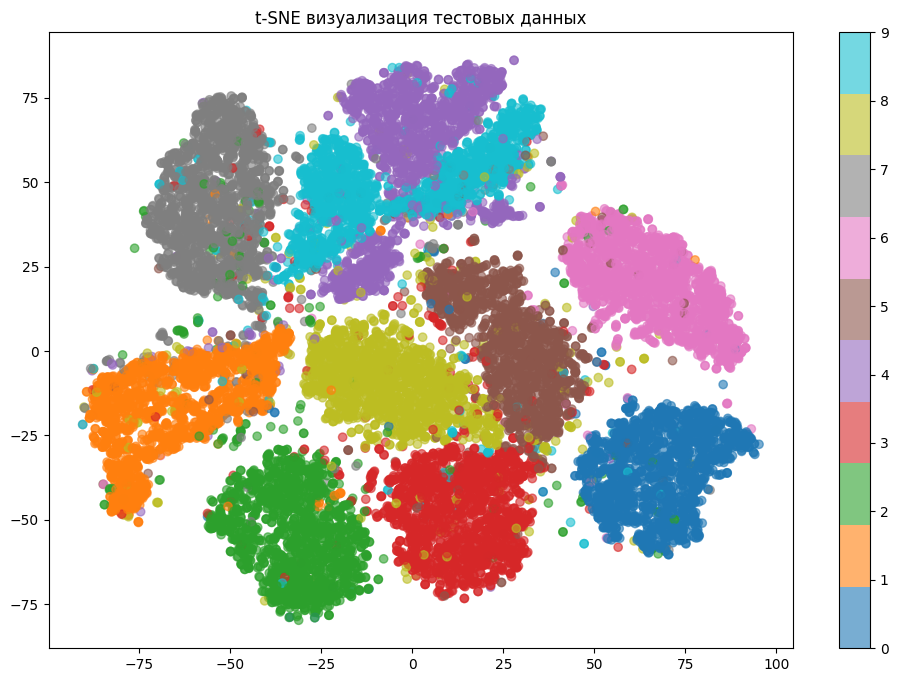

In [7]:
batch_size = 100
y_pred = []
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i + batch_size]
    y_pred_batch = mycnn3.forward(batch)
    y_pred.append(y_pred_batch)
y_pred = np.vstack(y_pred)


# t-SNE визуализация
print("Выполняем t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
# Получаем признаки из предпоследнего слоя (до softmax)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
features_2d = tsne.fit_transform(X_test_flat)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1],
                    c=np.argmax(Y_test, axis=1),
                    cmap='tab10',
                    alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE визуализация тестовых данных')
plt.show()


Вычисляем метрики...


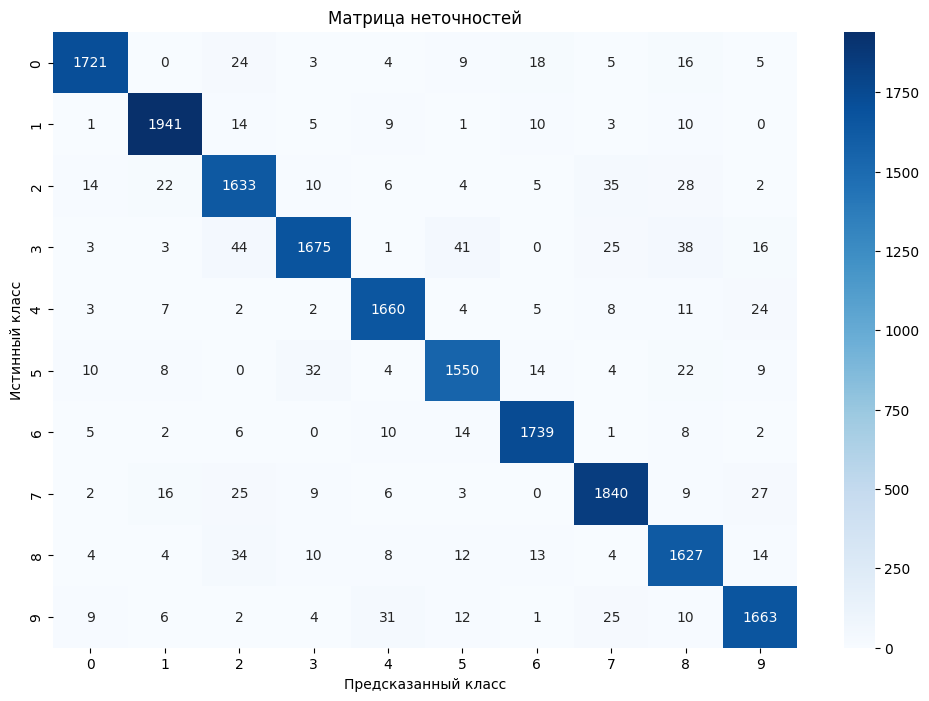


Строим ROC-кривые...


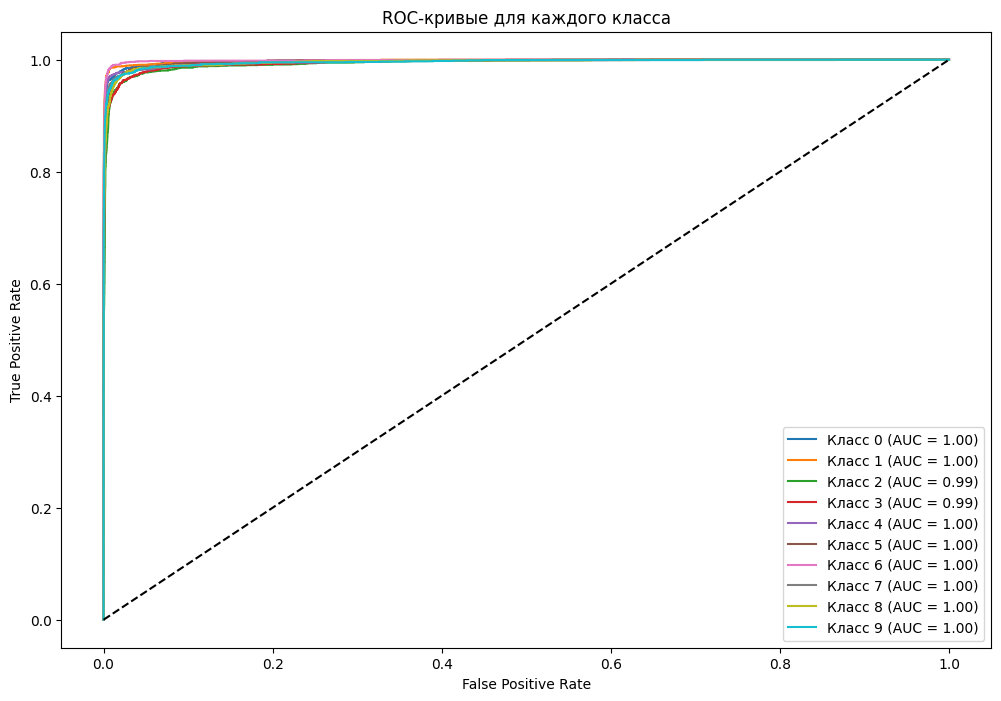


Анализ ошибок классификации:
Всего ошибок: 951 из 18000 (5.28%)

Класс 0:
Precision: 0.9712
Recall: 0.9535
F1-score: 0.9623
AUC: 0.9977

Класс 1:
Precision: 0.9662
Recall: 0.9734
F1-score: 0.9698
AUC: 0.9983

Класс 2:
Precision: 0.9154
Recall: 0.9284
F1-score: 0.9218
AUC: 0.9937

Класс 3:
Precision: 0.9571
Recall: 0.9074
F1-score: 0.9316
AUC: 0.9948

Класс 4:
Precision: 0.9546
Recall: 0.9618
F1-score: 0.9582
AUC: 0.9963

Класс 5:
Precision: 0.9394
Recall: 0.9377
F1-score: 0.9385
AUC: 0.9968

Класс 6:
Precision: 0.9634
Recall: 0.9731
F1-score: 0.9683
AUC: 0.9989

Класс 7:
Precision: 0.9436
Recall: 0.9499
F1-score: 0.9467
AUC: 0.9958

Класс 8:
Precision: 0.9146
Recall: 0.9405
F1-score: 0.9273
AUC: 0.9956

Класс 9:
Precision: 0.9438
Recall: 0.9433
F1-score: 0.9435
AUC: 0.9957

Macro average metrics:
Precision: 0.9469
Recall: 0.9469
F1-score: 0.9468
AUC: 0.9964

Weighted average metrics:
Precision: 0.9474
Recall: 0.9472
F1-score: 0.9472


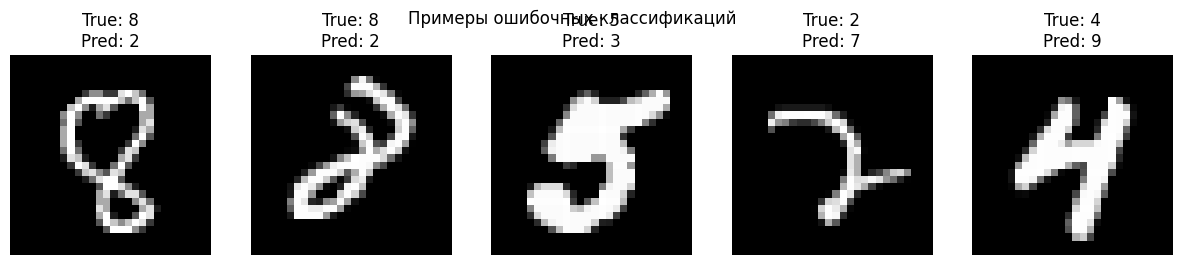


Наиболее частые ошибки:
Класс 3 принят за класс 8: 38 раз
Класс 3 принят за класс 5: 41 раз
Класс 3 принят за класс 2: 44 раз


In [9]:
# Матрица неточностей и метрики
print("\nВычисляем метрики...")
conf_matrix = confusion_matrix(Y_test, y_pred)

# Визуализация матрицы неточностей
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица неточностей')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Вычисление метрик
precision, recall, f1_scores = precision_recall_f1(conf_matrix)

# ROC-кривые и AUC
print("\nСтроим ROC-кривые...")
fpr, tpr, roc_auc = compute_roc_auc(Y_test, y_pred)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Класс {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для каждого класса')
plt.legend()
plt.show()

# Анализ ошибок
print("\nАнализ ошибок классификации:")
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)
errors = np.where(y_pred_classes != y_true_classes)[0]

print(f"Всего ошибок: {len(errors)} из {len(y_true_classes)} ({len(errors)/len(y_true_classes)*100:.2f}%)")

# Создаем словарь для хранения метрик по классам
class_metrics = {}

# Вычисляем метрики для каждого класса
for i in range(10):
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    class_metrics[i] = {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': roc_auc[i]
    }

# Выводим метрики по классам
for digit, metrics in class_metrics.items():
    print(f"\nКласс {digit}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")

# Macro average (простое среднее по классам)
macro_precision = np.mean([metrics['precision'] for metrics in class_metrics.values()])
macro_recall = np.mean([metrics['recall'] for metrics in class_metrics.values()])
macro_f1 = np.mean([metrics['f1'] for metrics in class_metrics.values()])
macro_auc = np.mean([metrics['auc'] for metrics in class_metrics.values()])

# Weighted average (взвешенное по количеству примеров каждого класса)
weights = np.sum(conf_matrix, axis=1) / np.sum(conf_matrix)
weighted_precision = np.sum([metrics['precision'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_recall = np.sum([metrics['recall'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_f1 = np.sum([metrics['f1'] * w for metrics, w in zip(class_metrics.values(), weights)])

print("\nMacro average metrics:")
print(f"Precision: {macro_precision:.4f}")
print(f"Recall: {macro_recall:.4f}")
print(f"F1-score: {macro_f1:.4f}")
print(f"AUC: {macro_auc:.4f}")

print("\nWeighted average metrics:")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-score: {weighted_f1:.4f}")
# Визуализация примеров ошибок
if len(errors) > 0:
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(errors[:5]):  # Показываем первые 5 ошибок
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}')
        plt.axis('off')
    plt.suptitle('Примеры ошибочных классификаций')
    plt.show()

# Анализ наиболее проблемных классов
error_matrix = conf_matrix - np.diag(np.diag(conf_matrix))
most_confused = np.unravel_index(np.argsort(error_matrix.ravel())[-3:], error_matrix.shape)
print("\nНаиболее частые ошибки:")
for i, j in zip(most_confused[0], most_confused[1]):
    print(f"Класс {i} принят за класс {j}: {error_matrix[i,j]} раз")

In [10]:

import os

# Проверяем текущую рабочую директорию
current_dir = os.getcwd()
print(f"Текущая директория: {current_dir}")

# Сохраняем веса
weights_path = 'model3_weights.npy'
mycnn3.save_weights(weights_path)

# Проверяем, что файл создался
if os.path.exists(weights_path):
    print(f"Файл создан: {os.path.abspath(weights_path)}")
    print(f"Размер файла: {os.path.getsize(weights_path) / 1024 / 1024:.2f} MB")

Текущая директория: c:\Users\klimm\Desktop\lab2\notebooks\experiments
Веса сохранены в model3_weights.npy
Файл создан: c:\Users\klimm\Desktop\lab2\notebooks\experiments\model3_weights.npy
Размер файла: 4.91 MB


Меням дропаут до 0.3

In [6]:
mycnn3 = MyCNN3(dropout_rate=0.3)
# Обучение модели
epochs = 10
learning_rate = 0.001
batch_size = 64
mycnn3.train(X_train_small, Y_train_small, epochs, learning_rate, batch_size, X_test_small, Y_test_small)


Epoch 1/10
Training - Loss: 0.8197, Accuracy: 85.01%, F1: 0.8486
Validation - Loss: 0.3571, Accuracy: 95.99%, F1: 0.9595

Epoch 2/10
Training - Loss: 0.5051, Accuracy: 91.32%, F1: 0.9126
Validation - Loss: 0.3061, Accuracy: 95.22%, F1: 0.9514

Epoch 3/10
Training - Loss: 0.4241, Accuracy: 92.51%, F1: 0.9246
Validation - Loss: 0.2907, Accuracy: 95.12%, F1: 0.9511

Epoch 4/10
Training - Loss: 0.4038, Accuracy: 92.31%, F1: 0.9225
Validation - Loss: 0.2534, Accuracy: 95.85%, F1: 0.9581

Epoch 5/10
Training - Loss: 0.3725, Accuracy: 92.81%, F1: 0.9276
Validation - Loss: 0.2536, Accuracy: 95.51%, F1: 0.9546

Epoch 6/10
Training - Loss: 0.3569, Accuracy: 93.15%, F1: 0.9310
Validation - Loss: 0.2354, Accuracy: 96.01%, F1: 0.9598

Epoch 7/10
Training - Loss: 0.3382, Accuracy: 93.64%, F1: 0.9359
Validation - Loss: 0.2505, Accuracy: 95.57%, F1: 0.9553

Epoch 8/10
Training - Loss: 0.3123, Accuracy: 94.21%, F1: 0.9417
Validation - Loss: 0.2283, Accuracy: 96.19%, F1: 0.9616

Epoch 9/10
Training - L

Выполняем t-SNE...


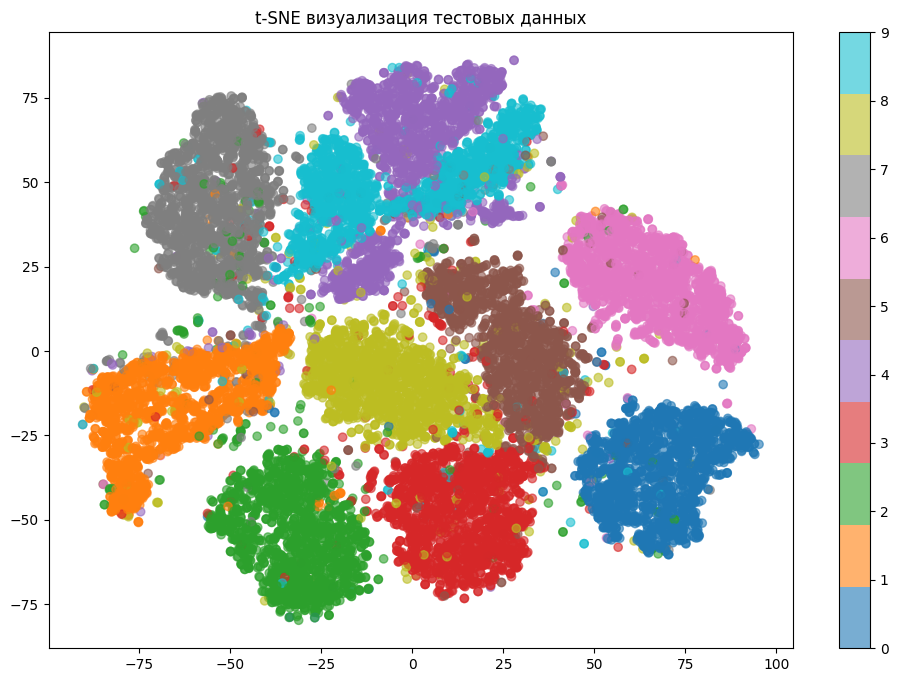

In [7]:
batch_size = 100
y_pred = []
for i in range(0, len(X_test), batch_size):
    batch = X_test[i:i + batch_size]
    y_pred_batch = mycnn3.forward(batch)
    y_pred.append(y_pred_batch)
y_pred = np.vstack(y_pred)


# t-SNE визуализация
print("Выполняем t-SNE...")
tsne = TSNE(n_components=2, random_state=42)
# Получаем признаки из предпоследнего слоя (до softmax)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
features_2d = tsne.fit_transform(X_test_flat)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1],
                    c=np.argmax(Y_test, axis=1),
                    cmap='tab10',
                    alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE визуализация тестовых данных')
plt.show()


Вычисляем метрики...


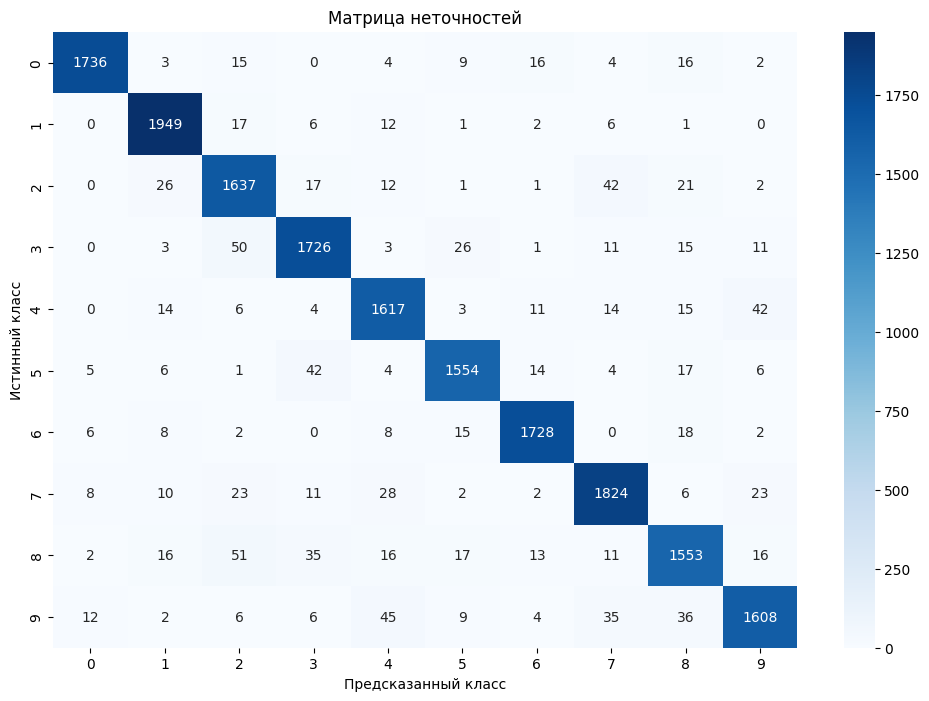


Строим ROC-кривые...


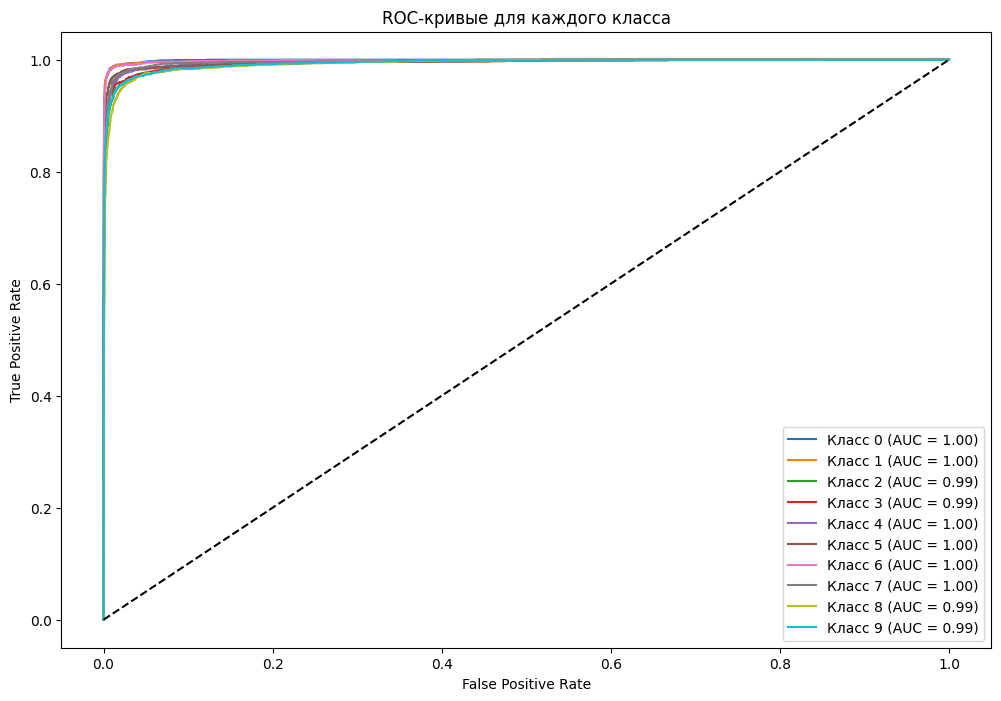


Анализ ошибок классификации:
Всего ошибок: 1068 из 18000 (5.93%)

Класс 0:
Precision: 0.9813
Recall: 0.9618
F1-score: 0.9715
AUC: 0.9992

Класс 1:
Precision: 0.9568
Recall: 0.9774
F1-score: 0.9670
AUC: 0.9986

Класс 2:
Precision: 0.9054
Recall: 0.9306
F1-score: 0.9179
AUC: 0.9938

Класс 3:
Precision: 0.9345
Recall: 0.9350
F1-score: 0.9347
AUC: 0.9940

Класс 4:
Precision: 0.9245
Recall: 0.9368
F1-score: 0.9306
AUC: 0.9962

Класс 5:
Precision: 0.9493
Recall: 0.9401
F1-score: 0.9447
AUC: 0.9963

Класс 6:
Precision: 0.9643
Recall: 0.9670
F1-score: 0.9656
AUC: 0.9980

Класс 7:
Precision: 0.9349
Recall: 0.9417
F1-score: 0.9383
AUC: 0.9958

Класс 8:
Precision: 0.9146
Recall: 0.8977
F1-score: 0.9061
AUC: 0.9929

Класс 9:
Precision: 0.9393
Recall: 0.9121
F1-score: 0.9255
AUC: 0.9940

Macro average metrics:
Precision: 0.9405
Recall: 0.9400
F1-score: 0.9402
AUC: 0.9959

Weighted average metrics:
Precision: 0.9408
Recall: 0.9407
F1-score: 0.9407


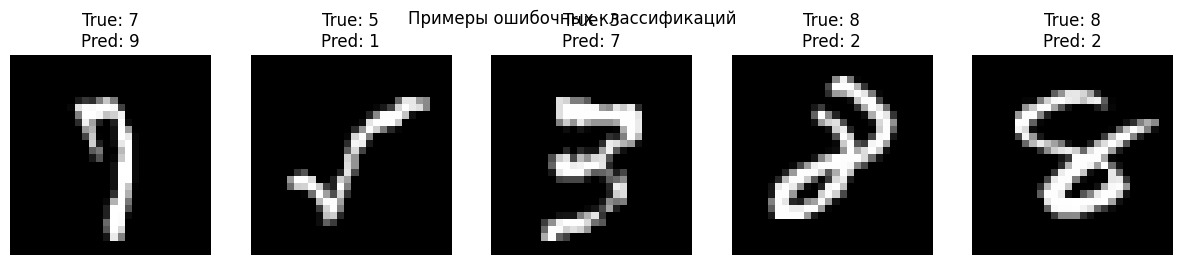


Наиболее частые ошибки:
Класс 9 принят за класс 4: 45 раз
Класс 3 принят за класс 2: 50 раз
Класс 8 принят за класс 2: 51 раз


In [8]:
# Матрица неточностей и метрики
print("\nВычисляем метрики...")
conf_matrix = confusion_matrix(Y_test, y_pred)

# Визуализация матрицы неточностей
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица неточностей')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

# Вычисление метрик
precision, recall, f1_scores = precision_recall_f1(conf_matrix)

# ROC-кривые и AUC
print("\nСтроим ROC-кривые...")
fpr, tpr, roc_auc = compute_roc_auc(Y_test, y_pred)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Класс {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для каждого класса')
plt.legend()
plt.show()

# Анализ ошибок
print("\nАнализ ошибок классификации:")
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)
errors = np.where(y_pred_classes != y_true_classes)[0]

print(f"Всего ошибок: {len(errors)} из {len(y_true_classes)} ({len(errors)/len(y_true_classes)*100:.2f}%)")

# Создаем словарь для хранения метрик по классам
class_metrics = {}

# Вычисляем метрики для каждого класса
for i in range(10):
    tp = conf_matrix[i, i]
    fp = np.sum(conf_matrix[:, i]) - tp
    fn = np.sum(conf_matrix[i, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    class_metrics[i] = {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': roc_auc[i]
    }

# Выводим метрики по классам
for digit, metrics in class_metrics.items():
    print(f"\nКласс {digit}:")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-score: {metrics['f1']:.4f}")
    print(f"AUC: {metrics['auc']:.4f}")

# Macro average (простое среднее по классам)
macro_precision = np.mean([metrics['precision'] for metrics in class_metrics.values()])
macro_recall = np.mean([metrics['recall'] for metrics in class_metrics.values()])
macro_f1 = np.mean([metrics['f1'] for metrics in class_metrics.values()])
macro_auc = np.mean([metrics['auc'] for metrics in class_metrics.values()])

# Weighted average (взвешенное по количеству примеров каждого класса)
weights = np.sum(conf_matrix, axis=1) / np.sum(conf_matrix)
weighted_precision = np.sum([metrics['precision'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_recall = np.sum([metrics['recall'] * w for metrics, w in zip(class_metrics.values(), weights)])
weighted_f1 = np.sum([metrics['f1'] * w for metrics, w in zip(class_metrics.values(), weights)])

print("\nMacro average metrics:")
print(f"Precision: {macro_precision:.4f}")
print(f"Recall: {macro_recall:.4f}")
print(f"F1-score: {macro_f1:.4f}")
print(f"AUC: {macro_auc:.4f}")

print("\nWeighted average metrics:")
print(f"Precision: {weighted_precision:.4f}")
print(f"Recall: {weighted_recall:.4f}")
print(f"F1-score: {weighted_f1:.4f}")
# Визуализация примеров ошибок
if len(errors) > 0:
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(errors[:5]):  # Показываем первые 5 ошибок
        plt.subplot(1, 5, i+1)
        plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}')
        plt.axis('off')
    plt.suptitle('Примеры ошибочных классификаций')
    plt.show()

# Анализ наиболее проблемных классов
error_matrix = conf_matrix - np.diag(np.diag(conf_matrix))
most_confused = np.unravel_index(np.argsort(error_matrix.ravel())[-3:], error_matrix.shape)
print("\nНаиболее частые ошибки:")
for i, j in zip(most_confused[0], most_confused[1]):
    print(f"Класс {i} принят за класс {j}: {error_matrix[i,j]} раз")

In [9]:

import os

# Проверяем текущую рабочую директорию
current_dir = os.getcwd()
print(f"Текущая директория: {current_dir}")

# Сохраняем веса
weights_path = 'model3_2_weights.npy'
mycnn3.save_weights(weights_path)

# Проверяем, что файл создался
if os.path.exists(weights_path):
    print(f"Файл создан: {os.path.abspath(weights_path)}")
    print(f"Размер файла: {os.path.getsize(weights_path) / 1024 / 1024:.2f} MB")

Текущая директория: c:\Users\klimm\Desktop\lab2\notebooks\experiments
Веса сохранены в model3_2_weights.npy
Файл создан: c:\Users\klimm\Desktop\lab2\notebooks\experiments\model3_2_weights.npy
Размер файла: 4.91 MB
